# Phenanthrene's HOMO, LUMO and electron density plots

## 🖼 Static Visualisations of Phenanthrene's Electronic Structure

This notebook presents **static fallback visualizations** of key electronic properties of phenanthrene, in case the interactive features (e.g., sliders and widgets) are not supported in your environment (e.g., when viewing on GitHub).

The plots below correspond to key quantum-chemical observables:

---

### 🔷 1. HOMO Orbital Plot

- Displays the **Highest Occupied Molecular Orbital (HOMO)** amplitude contributions per atom.
- Highlights regions of electron density associated with **electron donation** potential.
- Helps identify likely sites involved in π-electron delocalization and oxidation processes.

---

### 🟣 2. LUMO Orbital Plot

- Shows the **Lowest Unoccupied Molecular Orbital (LUMO)** amplitude per atom.
- Indicates atoms likely to accept electrons in reactions (e.g., **reduction or nucleophilic attack**).
- A complementary view to HOMO, crucial for frontier molecular orbital (FMO) analysis.

---

### ⚪ 3. Electron Density (Z-slice) from `.cube` File

- A 2D slice from the 3D electron density cube, plotted along the **z-axis**.
- Visualizes the **spatial distribution of electron cloud** across the phenanthrene backbone.
- Useful for seeing nodal structure, bonding regions, and orbital delocalization.

---

These plots provide a chemically intuitive view of reactivity and stability patterns in phenanthrene, even without interactivity. For a live, widget-enabled version, please launch the full notebook in Binder (link available in the _Phenanthrene Stability and Reactivity analysis.ipynb_ file).

## Phenanthrene HOMO plot

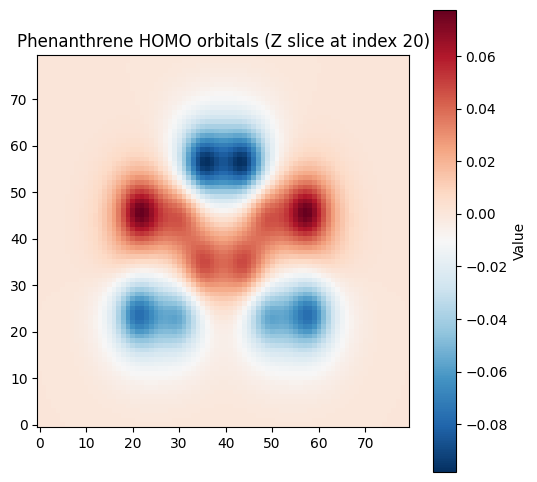

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def read_cube(phenanthrene_HOMO):
    with open("phenanthrene_HOMO.cube", 'r') as f:
        lines = f.readlines()

    # Parse header
    origin = np.array([float(x) for x in lines[2].split()[1:]])
    nx, vx = int(lines[3].split()[0]), [float(x) for x in lines[3].split()[1:]]
    ny, vy = int(lines[4].split()[0]), [float(x) for x in lines[4].split()[1:]]
    nz, vz = int(lines[5].split()[0]), [float(x) for x in lines[5].split()[1:]]

    # Skip atom block (line 6 to 6 + num_atoms)
    num_atoms = int(lines[2].split()[0])
    data_lines = lines[6 + num_atoms:]

    # Flatten and reshape cube data
    data = np.array([float(v) for line in data_lines for v in line.split()])
    data = data.reshape((nz, ny, nx))  # Note: z, y, x ordering

    return data, (nx, ny, nz), (vx, vy, vz), origin

def plot_cube_slice(cube_data, axis='z', index=None, cmap='RdBu_r'):
    if axis == 'z':
        slice_2d = cube_data[index, :, :]
    elif axis == 'y':
        slice_2d = cube_data[:, index, :]
    elif axis == 'x':
        slice_2d = cube_data[:, :, index]
    else:
        raise ValueError("Axis must be one of: x, y, z")

    plt.figure(figsize=(6, 6))
    plt.imshow(slice_2d, cmap=cmap, origin='lower')
    plt.colorbar(label='Value')
    plt.title(f'Phenanthrene HOMO orbitals ({axis.upper()} slice at index {index})')
    plt.show()

# Usage
filename = "phenanthrene_HOMO.cube"  # replace with your filename
cube_data, dims, vectors, origin = read_cube("phenanthrene_HOMO.cube")

# Choose a slice index (e.g., middle slice along z-axis)
z_mid = dims[2] // 4
plot_cube_slice(cube_data, axis='z', index=z_mid)

## Phenanthrene LUMO plot

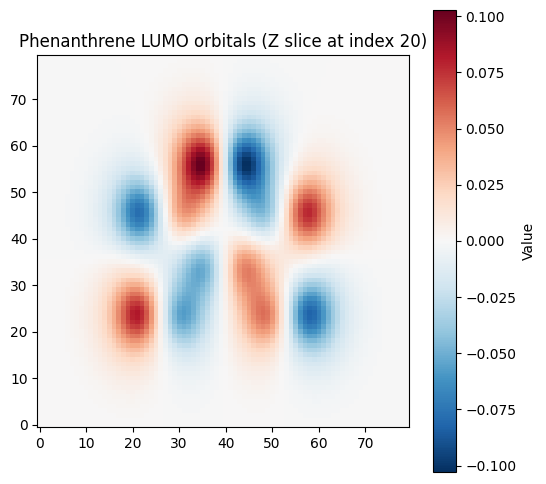

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def read_cube(phenanthrene_LUMO):
    with open("phenanthrene_LUMO.cube", 'r') as f:
        lines = f.readlines()

    # Parse header
    origin = np.array([float(x) for x in lines[2].split()[1:]])
    nx, vx = int(lines[3].split()[0]), [float(x) for x in lines[3].split()[1:]]
    ny, vy = int(lines[4].split()[0]), [float(x) for x in lines[4].split()[1:]]
    nz, vz = int(lines[5].split()[0]), [float(x) for x in lines[5].split()[1:]]

    # Skip atom block (line 6 to 6 + num_atoms)
    num_atoms = int(lines[2].split()[0])
    data_lines = lines[6 + num_atoms:]

    # Flatten and reshape cube data
    data = np.array([float(v) for line in data_lines for v in line.split()])
    data = data.reshape((nz, ny, nx))  # Note: z, y, x ordering

    return data, (nx, ny, nz), (vx, vy, vz), origin

def plot_cube_slice(cube_data, axis='z', index=None, cmap='RdBu_r'):
    if axis == 'z':
        slice_2d = cube_data[index, :, :]
    elif axis == 'y':
        slice_2d = cube_data[:, index, :]
    elif axis == 'x':
        slice_2d = cube_data[:, :, index]
    else:
        raise ValueError("Axis must be one of: x, y, z")

    plt.figure(figsize=(6, 6))
    plt.imshow(slice_2d, cmap=cmap, origin='lower')
    plt.colorbar(label='Value')
    plt.title(f'Phenanthrene LUMO orbitals ({axis.upper()} slice at index {index})')
    plt.show()

# Usage
filename = "phenanthrene_LUMO.cube"  # replace with your filename
cube_data, dims, vectors, origin = read_cube("phenanthrene_LUMO.cube")

# Choose a slice index (e.g., middle slice along z-axis)
z_mid = dims[2] // 4
plot_cube_slice(cube_data, axis='z', index=z_mid)

## Phenanthrene electron density plot

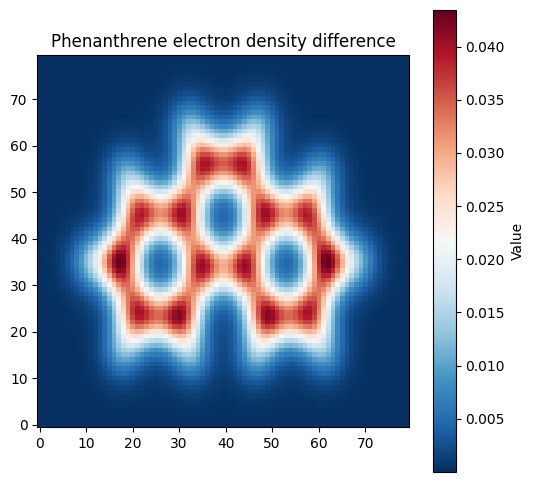

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def read_cube(phenanthrene_dens_diff):
    with open("phenanthrene_dens_diff.cube", 'r') as f:
        lines = f.readlines()

    # Parse header
    origin = np.array([float(x) for x in lines[2].split()[1:]])
    nx, vx = int(lines[3].split()[0]), [float(x) for x in lines[3].split()[1:]]
    ny, vy = int(lines[4].split()[0]), [float(x) for x in lines[4].split()[1:]]
    nz, vz = int(lines[5].split()[0]), [float(x) for x in lines[5].split()[1:]]

    # Skip atom block (line 6 to 6 + num_atoms)
    num_atoms = int(lines[2].split()[0])
    data_lines = lines[6 + num_atoms:]

    # Flatten and reshape cube data
    data = np.array([float(v) for line in data_lines for v in line.split()])
    data = data.reshape((nz, ny, nx))  # Note: z, y, x ordering

    return data, (nx, ny, nz), (vx, vy, vz), origin

def plot_cube_slice(cube_data, axis='z', index=None, cmap='RdBu_r'):
    if axis == 'z':
        slice_2d = cube_data[index, :, :]
    elif axis == 'y':
        slice_2d = cube_data[:, index, :]
    elif axis == 'x':
        slice_2d = cube_data[:, :, index]
    else:
        raise ValueError("Axis must be one of: x, y, z")

    plt.figure(figsize=(6, 6))
    plt.imshow(slice_2d, cmap=cmap, origin='lower')
    plt.colorbar(label='Value')
    plt.title(f'Phenanthrene electron density difference')
    plt.show()

# Usage
filename = "phenanthrene_dens_diff.cube"  # replace with your filename
cube_data, dims, vectors, origin = read_cube("phenanthrene_dens_diff.cube")

# Choose a slice index (e.g., middle slice along z-axis)
z_mid = dims[2] // 4
plot_cube_slice(cube_data, axis='z', index=z_mid)